In [1]:
#Importing Packages
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [2]:
seed=7

In [3]:
# Importing the dataset
dt = pd.read_excel('Flux Clinical.xlsx',index_col=0)

In [4]:
dt.shape

(517, 2309)

In [5]:
dt.head(2)

,'3DSPHR','3HBCOAHLm','ABTArm','ABTD','ACACT1r','ACACT1rm','ACACT1x','ACOAD9m','ACOAO7p','ACOATA',...,Tissue Source Site_NJ,Tissue Source Site_O1,Tissue Source Site_S2,Person Neoplasm Status_TUMOR FREE,Person Neoplasm Status_WITH TUMOR,Vial number_A,Vial number_B,Patient's Vital Status_Alive,Patient's Vital Status_Dead,Overall Survival (Months)
HUG0_SYMBOL,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,11.448262,154.187481,-583.764387,-14.237357,125.403072,235.338244,457.654536,74.716367,72.493260,-165.591744,...,0,0,0,1,0,1,0,1,0,0.00
TCGA-05-4249-01,9.173955,162.200877,-442.863722,-5.338254,128.134267,137.492687,149.939274,75.026103,56.620656,-73.252506,...,0,0,0,1,0,1,0,1,0,50.03


In [6]:
del dt['Column1']
del dt['Patient\'s Vital Status_Dead']
del dt['Patient\'s Vital Status_Alive']
dt.shape

(517, 2306)

In [7]:
X = dt.iloc[:,0:2305].values
y = dt.iloc[:, -1].values

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

In [10]:
sc_y = StandardScaler()
y_train = np.squeeze(sc_y.fit_transform(y_train.reshape(-1, 1)))
y_val = np.squeeze(sc_y.transform(y_val.reshape(-1, 1)))
y_test = np.squeeze(sc_y.transform(y_test.reshape(-1, 1)))

In [11]:
def baseline_model():
 #create model
    model = Sequential()
    
    # The Input Layer:
    model.add(Dense(128, kernel_initializer='normal', input_dim = X_train.shape[1], activation='relu'))
    
    # The Hidden Layers:
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    
    # The Output Layer:
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    
    # Compile Model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
    return model

In [12]:
model = KerasRegressor(build_fn=baseline_model, batch_size=15, epochs=10, verbose=True)

In [13]:
kfold =KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std())) 

Epoch 1/10
297/297 [==============================] - 0s 697us/sample - loss: 1.0782 - mean_absolute_error: 0.6612
Epoch 2/10
297/297 [==============================] - 0s 187us/sample - loss: 0.9446 - mean_absolute_error: 0.6439
Epoch 3/10
297/297 [==============================] - 0s 198us/sample - loss: 0.7798 - mean_absolute_error: 0.5824
Epoch 4/10
297/297 [==============================] - 0s 197us/sample - loss: 0.5367 - mean_absolute_error: 0.4827
Epoch 5/10
297/297 [==============================] - 0s 206us/sample - loss: 0.4738 - mean_absolute_error: 0.4603
Epoch 6/10
297/297 [==============================] - 0s 206us/sample - loss: 0.2316 - mean_absolute_error: 0.3548
Epoch 7/10
297/297 [==============================] - 0s 185us/sample - loss: 0.2875 - mean_absolute_error: 0.3830
Epoch 8/10
297/297 [==============================] - 0s 209us/sample - loss: 0.3933 - mean_absolute_error: 0.4047
Epoch 9/10
297/297 [==============================] - 0s 198us/sample - loss: 0.

Epoch 7/10
297/297 [==============================] - 0s 197us/sample - loss: 0.4889 - mean_absolute_error: 0.4702
Epoch 8/10
297/297 [==============================] - 0s 185us/sample - loss: 0.4652 - mean_absolute_error: 0.4390
Epoch 9/10
297/297 [==============================] - 0s 181us/sample - loss: 0.3223 - mean_absolute_error: 0.3717
Epoch 10/10
33/33 [==============================] - 0s 1ms/sample - loss: 1.3690 - mean_absolute_error: 0.6317
Epoch 1/10
297/297 [==============================] - 0s 592us/sample - loss: 1.0800 - mean_absolute_error: 0.6851
Epoch 2/10
297/297 [==============================] - 0s 184us/sample - loss: 0.9687 - mean_absolute_error: 0.6731
Epoch 3/10
297/297 [==============================] - 0s 180us/sample - loss: 0.7874 - mean_absolute_error: 0.5969
Epoch 4/10
297/297 [==============================] - 0s 177us/sample - loss: 0.6163 - mean_absolute_error: 0.5434
Epoch 5/10
297/297 [==============================] - 0s 185us/sample - loss: 0.492

In [14]:
model.fit(X_train, y_train)

Epoch 1/10
330/330 [==============================] - 0s 557us/sample - loss: 1.0786 - mean_absolute_error: 0.6897
Epoch 2/10
330/330 [==============================] - 0s 194us/sample - loss: 0.8982 - mean_absolute_error: 0.6439
Epoch 3/10
330/330 [==============================] - 0s 192us/sample - loss: 0.6128 - mean_absolute_error: 0.5406
Epoch 4/10
330/330 [==============================] - 0s 192us/sample - loss: 0.6804 - mean_absolute_error: 0.5257
Epoch 5/10
330/330 [==============================] - 0s 198us/sample - loss: 0.7262 - mean_absolute_error: 0.5291
Epoch 6/10
330/330 [==============================] - 0s 192us/sample - loss: 0.5832 - mean_absolute_error: 0.5203
Epoch 7/10
330/330 [==============================] - 0s 191us/sample - loss: 0.4060 - mean_absolute_error: 0.4200
Epoch 8/10
330/330 [==============================] - 0s 196us/sample - loss: 0.3310 - mean_absolute_error: 0.4028
Epoch 9/10
330/330 [==============================] - 0s 200us/sample - loss: 0.

In [15]:
y_predval = model.predict(X_val)

83/83 [==============================] - 0s 214us/sample


In [16]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

0.6126067113669297
0.7404599320293428
0.8604998152407372
R2 Score
-0.038612458509975855


R^2 = -0.0386


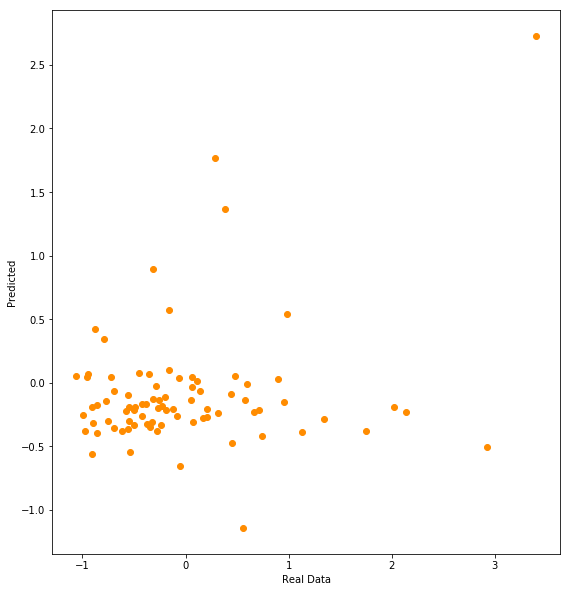

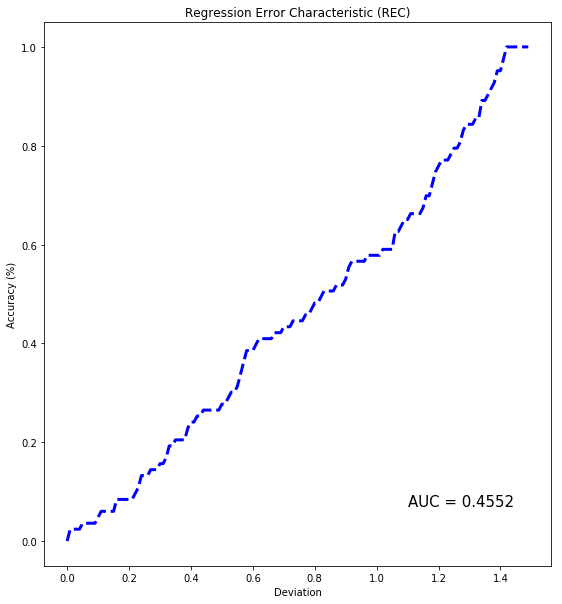

In [18]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(20 , 10))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.figure(figsize=(20 , 10))
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
print("R^2 = %0.4f" %RR)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()

In [19]:
# define the grid search paramerters
batch_size = [5, 10, 15, 20]
epochs = [10, 20,30,40]

In [20]:
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)

/Users/Zayeem/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
220/220 [==============================] - 0s 1ms/sample - loss: 1.2236 - mean_absolute_error: 0.7125
Epoch 2/10
220/220 [==============================] - 0s 508us/sample - loss: 1.0011 - mean_absolute_error: 0.6293
Epoch 3/10
220/220 [==============================] - 0s 511us/sample - loss: 0.9498 - mean_absolute_error: 0.6215
Epoch 4/10
220/220 [==============================] - 0s 495us/sample - loss: 0.8487 - mean_absolute_error: 0.6023
Epoch 5/10
220/220 [==============================] - 0s 527us/sample - loss: 0.7227 - mean_absolute_error: 0.5455
Epoch 6/10
220/220 [==============================] - 0s 495us/sample - loss: 0.4252 - mean_absolute_error: 0.4383
Epoch 7/10
220/220 [==============================] - 0s 514us/sample - loss: 0.5509 - mean_absolute_error: 0.4709
Epoch 8/10
220/220 [==============================] - 0s 498us/sample - loss: 0.5118 - mean_absolute_error: 0.4725
Epoch 9/10
220/220 [==============================] - 0s 509us/sample - loss: 0.39

Epoch 15/20
220/220 [==============================] - 0s 510us/sample - loss: 0.0356 - mean_absolute_error: 0.1321
Epoch 16/20
220/220 [==============================] - 0s 490us/sample - loss: 0.0211 - mean_absolute_error: 0.1079
Epoch 17/20
220/220 [==============================] - 0s 499us/sample - loss: 0.0130 - mean_absolute_error: 0.0834
Epoch 18/20
220/220 [==============================] - 0s 484us/sample - loss: 0.0156 - mean_absolute_error: 0.0888
Epoch 19/20
220/220 [==============================] - 0s 502us/sample - loss: 0.0192 - mean_absolute_error: 0.0884
Epoch 20/20
220/220 [==============================] - 0s 179us/sample - loss: 0.0290 - mean_absolute_error: 0.1263
Epoch 1/20
220/220 [==============================] - 0s 1ms/sample - loss: 1.3930 - mean_absolute_error: 0.8065
Epoch 2/20
220/220 [==============================] - 0s 507us/sample - loss: 1.1722 - mean_absolute_error: 0.7151
Epoch 3/20
220/220 [==============================] - 0s 488us/sample - loss

220/220 [==============================] - 0s 578us/sample - loss: 0.1804 - mean_absolute_error: 0.2905
Epoch 11/30
220/220 [==============================] - 0s 573us/sample - loss: 0.1490 - mean_absolute_error: 0.2840
Epoch 12/30
220/220 [==============================] - 0s 566us/sample - loss: 0.1134 - mean_absolute_error: 0.2328
Epoch 13/30
220/220 [==============================] - 0s 572us/sample - loss: 0.0580 - mean_absolute_error: 0.1815
Epoch 14/30
220/220 [==============================] - 0s 576us/sample - loss: 0.0633 - mean_absolute_error: 0.1683
Epoch 15/30
220/220 [==============================] - 0s 573us/sample - loss: 0.0776 - mean_absolute_error: 0.1754
Epoch 16/30
220/220 [==============================] - 0s 572us/sample - loss: 0.0717 - mean_absolute_error: 0.1806
Epoch 17/30
220/220 [==============================] - 0s 585us/sample - loss: 0.0426 - mean_absolute_error: 0.1437
Epoch 18/30
220/220 [==============================] - 0s 563us/sample - loss: 0.036

220/220 [==============================] - 0s 514us/sample - loss: 0.1046 - mean_absolute_error: 0.2068
Epoch 18/40
220/220 [==============================] - 0s 509us/sample - loss: 0.1131 - mean_absolute_error: 0.1803
Epoch 19/40
220/220 [==============================] - 0s 519us/sample - loss: 0.1175 - mean_absolute_error: 0.2000
Epoch 20/40
220/220 [==============================] - 0s 496us/sample - loss: 0.1074 - mean_absolute_error: 0.2174
Epoch 21/40
220/220 [==============================] - 0s 509us/sample - loss: 0.1587 - mean_absolute_error: 0.2312
Epoch 22/40
220/220 [==============================] - 0s 530us/sample - loss: 0.1949 - mean_absolute_error: 0.2731
Epoch 23/40
220/220 [==============================] - 0s 514us/sample - loss: 0.1078 - mean_absolute_error: 0.2219
Epoch 24/40
220/220 [==============================] - 0s 496us/sample - loss: 0.0547 - mean_absolute_error: 0.1493
Epoch 25/40
220/220 [==============================] - 0s 530us/sample - loss: 0.050

220/220 [==============================] - 0s 507us/sample - loss: 0.9233 - mean_absolute_error: 0.6424
Epoch 5/40
220/220 [==============================] - 0s 501us/sample - loss: 0.6990 - mean_absolute_error: 0.5933
Epoch 6/40
220/220 [==============================] - 0s 493us/sample - loss: 0.6511 - mean_absolute_error: 0.5734
Epoch 7/40
220/220 [==============================] - 0s 503us/sample - loss: 0.3819 - mean_absolute_error: 0.4327
Epoch 8/40
220/220 [==============================] - 0s 502us/sample - loss: 0.3411 - mean_absolute_error: 0.4117
Epoch 9/40
220/220 [==============================] - 0s 497us/sample - loss: 0.5836 - mean_absolute_error: 0.5174
Epoch 10/40
220/220 [==============================] - 0s 508us/sample - loss: 0.2920 - mean_absolute_error: 0.3914
Epoch 11/40
220/220 [==============================] - 0s 508us/sample - loss: 0.3282 - mean_absolute_error: 0.3836
Epoch 12/40
220/220 [==============================] - 0s 499us/sample - loss: 0.2229 - m

220/220 [==============================] - 0s 284us/sample - loss: 0.1384 - mean_absolute_error: 0.2703
Epoch 10/10
220/220 [==============================] - 0s 97us/sample - loss: 0.0939 - mean_absolute_error: 0.2291
Epoch 1/20
220/220 [==============================] - 0s 855us/sample - loss: 1.0834 - mean_absolute_error: 0.6881
Epoch 2/20
220/220 [==============================] - 0s 301us/sample - loss: 1.0347 - mean_absolute_error: 0.6722
Epoch 3/20
220/220 [==============================] - 0s 306us/sample - loss: 0.7929 - mean_absolute_error: 0.5789
Epoch 4/20
220/220 [==============================] - 0s 304us/sample - loss: 0.7395 - mean_absolute_error: 0.5583
Epoch 5/20
220/220 [==============================] - 0s 310us/sample - loss: 0.4589 - mean_absolute_error: 0.4631
Epoch 6/20
220/220 [==============================] - 0s 312us/sample - loss: 0.5493 - mean_absolute_error: 0.4739
Epoch 7/20
220/220 [==============================] - 0s 312us/sample - loss: 0.3669 - mean

220/220 [==============================] - 0s 350us/sample - loss: 1.0008 - mean_absolute_error: 0.6543
Epoch 3/30
220/220 [==============================] - 0s 322us/sample - loss: 0.8456 - mean_absolute_error: 0.6081
Epoch 4/30
220/220 [==============================] - 0s 315us/sample - loss: 0.6162 - mean_absolute_error: 0.4819
Epoch 5/30
220/220 [==============================] - 0s 307us/sample - loss: 0.3817 - mean_absolute_error: 0.4158
Epoch 6/30
220/220 [==============================] - 0s 306us/sample - loss: 0.3276 - mean_absolute_error: 0.3904
Epoch 7/30
220/220 [==============================] - 0s 315us/sample - loss: 0.4623 - mean_absolute_error: 0.4316
Epoch 8/30
220/220 [==============================] - 0s 305us/sample - loss: 0.3092 - mean_absolute_error: 0.3785
Epoch 9/30
220/220 [==============================] - 0s 320us/sample - loss: 0.1826 - mean_absolute_error: 0.2974
Epoch 10/30
220/220 [==============================] - 0s 304us/sample - loss: 0.1172 - mea

220/220 [==============================] - 0s 330us/sample - loss: 0.1635 - mean_absolute_error: 0.3032
Epoch 10/30
220/220 [==============================] - 0s 311us/sample - loss: 0.0940 - mean_absolute_error: 0.2391
Epoch 11/30
220/220 [==============================] - 0s 308us/sample - loss: 0.0647 - mean_absolute_error: 0.1967
Epoch 12/30
220/220 [==============================] - 0s 352us/sample - loss: 0.0565 - mean_absolute_error: 0.1740
Epoch 13/30
220/220 [==============================] - 0s 279us/sample - loss: 0.0569 - mean_absolute_error: 0.1624
Epoch 14/30
220/220 [==============================] - 0s 289us/sample - loss: 0.0494 - mean_absolute_error: 0.1670
Epoch 15/30
220/220 [==============================] - 0s 291us/sample - loss: 0.0576 - mean_absolute_error: 0.1728
Epoch 16/30
220/220 [==============================] - 0s 272us/sample - loss: 0.0612 - mean_absolute_error: 0.1680
Epoch 17/30
220/220 [==============================] - 0s 283us/sample - loss: 0.060

220/220 [==============================] - 0s 271us/sample - loss: 0.2956 - mean_absolute_error: 0.3762
Epoch 7/40
220/220 [==============================] - 0s 280us/sample - loss: 0.2563 - mean_absolute_error: 0.3674
Epoch 8/40
220/220 [==============================] - 0s 315us/sample - loss: 0.1912 - mean_absolute_error: 0.3177
Epoch 9/40
220/220 [==============================] - 0s 278us/sample - loss: 0.1215 - mean_absolute_error: 0.2415
Epoch 10/40
220/220 [==============================] - 0s 259us/sample - loss: 0.0909 - mean_absolute_error: 0.2202
Epoch 11/40
220/220 [==============================] - 0s 257us/sample - loss: 0.0504 - mean_absolute_error: 0.1717
Epoch 12/40
220/220 [==============================] - 0s 245us/sample - loss: 0.0324 - mean_absolute_error: 0.1346
Epoch 13/40
220/220 [==============================] - 0s 250us/sample - loss: 0.0269 - mean_absolute_error: 0.1193
Epoch 14/40
220/220 [==============================] - 0s 262us/sample - loss: 0.0140 -

220/220 [==============================] - 0s 355us/sample - loss: 0.0163 - mean_absolute_error: 0.0740
Epoch 36/40
220/220 [==============================] - 0s 314us/sample - loss: 0.0217 - mean_absolute_error: 0.0928
Epoch 37/40
220/220 [==============================] - 0s 324us/sample - loss: 0.0209 - mean_absolute_error: 0.0808
Epoch 38/40
220/220 [==============================] - 0s 279us/sample - loss: 0.0247 - mean_absolute_error: 0.0917
Epoch 39/40
220/220 [==============================] - 0s 305us/sample - loss: 0.0238 - mean_absolute_error: 0.0994
Epoch 40/40
220/220 [==============================] - 0s 85us/sample - loss: 0.0535 - mean_absolute_error: 0.1476
Epoch 1/10
220/220 [==============================] - 0s 765us/sample - loss: 1.0927 - mean_absolute_error: 0.6895
Epoch 2/10
220/220 [==============================] - 0s 182us/sample - loss: 1.0046 - mean_absolute_error: 0.6435
Epoch 3/10
220/220 [==============================] - 0s 185us/sample - loss: 0.8095 - 

220/220 [==============================] - 0s 180us/sample - loss: 0.2624 - mean_absolute_error: 0.3545
Epoch 8/20
220/220 [==============================] - 0s 182us/sample - loss: 0.1406 - mean_absolute_error: 0.2749
Epoch 9/20
220/220 [==============================] - 0s 180us/sample - loss: 0.1234 - mean_absolute_error: 0.2515
Epoch 10/20
220/220 [==============================] - 0s 187us/sample - loss: 0.1008 - mean_absolute_error: 0.2314
Epoch 11/20
220/220 [==============================] - 0s 183us/sample - loss: 0.0747 - mean_absolute_error: 0.1869
Epoch 12/20
220/220 [==============================] - 0s 201us/sample - loss: 0.0453 - mean_absolute_error: 0.1520
Epoch 13/20
220/220 [==============================] - 0s 193us/sample - loss: 0.0573 - mean_absolute_error: 0.1732
Epoch 14/20
220/220 [==============================] - 0s 189us/sample - loss: 0.0256 - mean_absolute_error: 0.1204
Epoch 15/20
220/220 [==============================] - 0s 189us/sample - loss: 0.0211 

220/220 [==============================] - 0s 192us/sample - loss: 0.6753 - mean_absolute_error: 0.5948
Epoch 3/30
220/220 [==============================] - 0s 201us/sample - loss: 0.5201 - mean_absolute_error: 0.5090
Epoch 4/30
220/220 [==============================] - 0s 187us/sample - loss: 0.4179 - mean_absolute_error: 0.4542
Epoch 5/30
220/220 [==============================] - 0s 192us/sample - loss: 0.4104 - mean_absolute_error: 0.4365
Epoch 6/30
220/220 [==============================] - 0s 198us/sample - loss: 0.2688 - mean_absolute_error: 0.3758
Epoch 7/30
220/220 [==============================] - 0s 190us/sample - loss: 0.1685 - mean_absolute_error: 0.2921
Epoch 8/30
220/220 [==============================] - 0s 186us/sample - loss: 0.1090 - mean_absolute_error: 0.2459
Epoch 9/30
220/220 [==============================] - 0s 185us/sample - loss: 0.0800 - mean_absolute_error: 0.2029
Epoch 10/30
220/220 [==============================] - 0s 187us/sample - loss: 0.0432 - mea

220/220 [==============================] - 0s 184us/sample - loss: 0.1093 - mean_absolute_error: 0.2310
Epoch 10/40
220/220 [==============================] - 0s 198us/sample - loss: 0.1304 - mean_absolute_error: 0.2572
Epoch 11/40
220/220 [==============================] - 0s 208us/sample - loss: 0.0964 - mean_absolute_error: 0.1946
Epoch 12/40
220/220 [==============================] - 0s 194us/sample - loss: 0.0479 - mean_absolute_error: 0.1627
Epoch 13/40
220/220 [==============================] - 0s 190us/sample - loss: 0.0336 - mean_absolute_error: 0.1141
Epoch 14/40
220/220 [==============================] - 0s 190us/sample - loss: 0.0476 - mean_absolute_error: 0.1246
Epoch 15/40
220/220 [==============================] - 0s 209us/sample - loss: 0.0604 - mean_absolute_error: 0.1643
Epoch 16/40
220/220 [==============================] - 0s 218us/sample - loss: 0.0465 - mean_absolute_error: 0.1406
Epoch 17/40
220/220 [==============================] - 0s 215us/sample - loss: 0.037

220/220 [==============================] - 0s 202us/sample - loss: 0.0106 - mean_absolute_error: 0.0665
Epoch 38/40
220/220 [==============================] - 0s 206us/sample - loss: 0.0293 - mean_absolute_error: 0.0950
Epoch 39/40
220/220 [==============================] - 0s 204us/sample - loss: 0.0434 - mean_absolute_error: 0.1476
Epoch 40/40
220/220 [==============================] - 0s 68us/sample - loss: 0.0602 - mean_absolute_error: 0.1652
Epoch 1/40
220/220 [==============================] - 0s 908us/sample - loss: 1.3804 - mean_absolute_error: 0.7956
Epoch 2/40
220/220 [==============================] - 0s 241us/sample - loss: 1.1894 - mean_absolute_error: 0.7393
Epoch 3/40
220/220 [==============================] - 0s 338us/sample - loss: 0.9232 - mean_absolute_error: 0.6311
Epoch 4/40
220/220 [==============================] - 0s 208us/sample - loss: 0.6257 - mean_absolute_error: 0.5802
Epoch 5/40
220/220 [==============================] - 0s 204us/sample - loss: 0.4444 - me

220/220 [==============================] - 0s 56us/sample - loss: 0.1007 - mean_absolute_error: 0.2029
Epoch 1/10
220/220 [==============================] - 0s 756us/sample - loss: 1.3424 - mean_absolute_error: 0.8025
Epoch 2/10
220/220 [==============================] - 0s 146us/sample - loss: 1.0862 - mean_absolute_error: 0.7114
Epoch 3/10
220/220 [==============================] - 0s 142us/sample - loss: 0.8946 - mean_absolute_error: 0.6490
Epoch 4/10
220/220 [==============================] - 0s 152us/sample - loss: 0.4948 - mean_absolute_error: 0.5037
Epoch 5/10
220/220 [==============================] - 0s 144us/sample - loss: 0.4485 - mean_absolute_error: 0.4451
Epoch 6/10
220/220 [==============================] - 0s 146us/sample - loss: 0.3864 - mean_absolute_error: 0.4332
Epoch 7/10
220/220 [==============================] - 0s 142us/sample - loss: 0.2611 - mean_absolute_error: 0.3507
Epoch 8/10
220/220 [==============================] - 0s 146us/sample - loss: 0.1268 - mean_

220/220 [==============================] - 0s 190us/sample - loss: 0.0279 - mean_absolute_error: 0.1214
Epoch 16/20
220/220 [==============================] - 0s 217us/sample - loss: 0.0285 - mean_absolute_error: 0.1159
Epoch 17/20
220/220 [==============================] - 0s 192us/sample - loss: 0.0138 - mean_absolute_error: 0.0844
Epoch 18/20
220/220 [==============================] - 0s 204us/sample - loss: 0.0106 - mean_absolute_error: 0.0722
Epoch 19/20
220/220 [==============================] - 0s 209us/sample - loss: 0.0097 - mean_absolute_error: 0.0703
Epoch 20/20
220/220 [==============================] - 0s 71us/sample - loss: 0.0121 - mean_absolute_error: 0.0766
Epoch 1/30
220/220 [==============================] - 0s 777us/sample - loss: 1.0875 - mean_absolute_error: 0.6961
Epoch 2/30
220/220 [==============================] - 0s 158us/sample - loss: 0.9549 - mean_absolute_error: 0.6534
Epoch 3/30
220/220 [==============================] - 0s 159us/sample - loss: 0.7676 - 

220/220 [==============================] - 0s 56us/sample - loss: 0.0014 - mean_absolute_error: 0.0276
Epoch 1/30
220/220 [==============================] - 0s 710us/sample - loss: 1.3376 - mean_absolute_error: 0.8058
Epoch 2/30
220/220 [==============================] - 0s 148us/sample - loss: 1.1349 - mean_absolute_error: 0.7221
Epoch 3/30
220/220 [==============================] - 0s 152us/sample - loss: 0.8025 - mean_absolute_error: 0.5993
Epoch 4/30
220/220 [==============================] - 0s 152us/sample - loss: 0.4728 - mean_absolute_error: 0.4837
Epoch 5/30
220/220 [==============================] - 0s 156us/sample - loss: 0.2932 - mean_absolute_error: 0.3819
Epoch 6/30
220/220 [==============================] - 0s 155us/sample - loss: 0.2406 - mean_absolute_error: 0.3731
Epoch 7/30
220/220 [==============================] - 0s 147us/sample - loss: 0.2374 - mean_absolute_error: 0.3480
Epoch 8/30
220/220 [==============================] - 0s 149us/sample - loss: 0.1532 - mean_

220/220 [==============================] - 0s 165us/sample - loss: 0.0080 - mean_absolute_error: 0.0603
Epoch 40/40
220/220 [==============================] - 0s 61us/sample - loss: 0.0053 - mean_absolute_error: 0.0491
Epoch 1/40
220/220 [==============================] - 0s 791us/sample - loss: 0.7860 - mean_absolute_error: 0.6259
Epoch 2/40
220/220 [==============================] - 0s 162us/sample - loss: 0.6487 - mean_absolute_error: 0.5787
Epoch 3/40
220/220 [==============================] - 0s 162us/sample - loss: 0.5196 - mean_absolute_error: 0.5052
Epoch 4/40
220/220 [==============================] - 0s 165us/sample - loss: 0.3361 - mean_absolute_error: 0.3869
Epoch 5/40
220/220 [==============================] - 0s 161us/sample - loss: 0.2069 - mean_absolute_error: 0.3355
Epoch 6/40
220/220 [==============================] - 0s 161us/sample - loss: 0.2739 - mean_absolute_error: 0.3743
Epoch 7/40
220/220 [==============================] - 0s 160us/sample - loss: 0.2264 - mean

220/220 [==============================] - 0s 170us/sample - loss: 0.0257 - mean_absolute_error: 0.1220
Epoch 27/40
220/220 [==============================] - 0s 164us/sample - loss: 0.0167 - mean_absolute_error: 0.0954
Epoch 28/40
220/220 [==============================] - 0s 165us/sample - loss: 0.0087 - mean_absolute_error: 0.0711
Epoch 29/40
220/220 [==============================] - 0s 166us/sample - loss: 0.0080 - mean_absolute_error: 0.0676
Epoch 30/40
220/220 [==============================] - 0s 209us/sample - loss: 0.0059 - mean_absolute_error: 0.0549
Epoch 31/40
220/220 [==============================] - 0s 211us/sample - loss: 0.0029 - mean_absolute_error: 0.0391
Epoch 32/40
220/220 [==============================] - 0s 215us/sample - loss: 0.0037 - mean_absolute_error: 0.0394
Epoch 33/40
220/220 [==============================] - 0s 207us/sample - loss: 0.0035 - mean_absolute_error: 0.0410
Epoch 34/40
220/220 [==============================] - 0s 171us/sample - loss: 0.002

In [21]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.951278 using {'batch_size': 15, 'epochs': 30}
-1.062369 (0.296879) with: {'batch_size': 5, 'epochs': 10}
-1.048836 (0.377902) with: {'batch_size': 5, 'epochs': 20}
-1.015451 (0.346619) with: {'batch_size': 5, 'epochs': 30}
-1.042244 (0.271995) with: {'batch_size': 5, 'epochs': 40}
-1.075602 (0.328908) with: {'batch_size': 10, 'epochs': 10}
-1.004121 (0.373531) with: {'batch_size': 10, 'epochs': 20}
-0.984475 (0.300983) with: {'batch_size': 10, 'epochs': 30}
-1.120836 (0.299835) with: {'batch_size': 10, 'epochs': 40}
-1.049346 (0.416690) with: {'batch_size': 15, 'epochs': 10}
-1.005780 (0.399884) with: {'batch_size': 15, 'epochs': 20}
-0.951278 (0.439174) with: {'batch_size': 15, 'epochs': 30}
-1.005030 (0.434164) with: {'batch_size': 15, 'epochs': 40}
-1.072961 (0.323027) with: {'batch_size': 20, 'epochs': 10}
-1.009779 (0.307386) with: {'batch_size': 20, 'epochs': 20}
-1.002210 (0.391433) with: {'batch_size': 20, 'epochs': 30}
-1.077789 (0.415243) with: {'batch_size': 20, 'ep

In [22]:
newmodel = KerasRegressor(build_fn=baseline_model, batch_size=15, epochs=30, verbose=True)

In [23]:
newmodel.fit(X_train, y_train)

Epoch 1/30
330/330 [==============================] - 0s 593us/sample - loss: 1.0947 - mean_absolute_error: 0.7154
Epoch 2/30
330/330 [==============================] - 0s 226us/sample - loss: 0.8937 - mean_absolute_error: 0.6065
Epoch 3/30
330/330 [==============================] - 0s 238us/sample - loss: 0.7319 - mean_absolute_error: 0.5884
Epoch 4/30
330/330 [==============================] - 0s 236us/sample - loss: 0.6961 - mean_absolute_error: 0.5436
Epoch 5/30
330/330 [==============================] - 0s 228us/sample - loss: 0.4443 - mean_absolute_error: 0.4712
Epoch 6/30
330/330 [==============================] - 0s 236us/sample - loss: 0.3644 - mean_absolute_error: 0.4244
Epoch 7/30
330/330 [==============================] - 0s 229us/sample - loss: 0.2919 - mean_absolute_error: 0.3814
Epoch 8/30
330/330 [==============================] - 0s 235us/sample - loss: 0.1374 - mean_absolute_error: 0.2782
Epoch 9/30
330/330 [==============================] - 0s 232us/sample - loss: 0.

In [24]:
y_predval = newmodel.predict(X_val)

83/83 [==============================] - 0s 225us/sample


In [25]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

0.6247519066150922
0.7566832940984413
0.869875447462705
R2 Score
-0.06136829611175454


R^2 = -0.0614


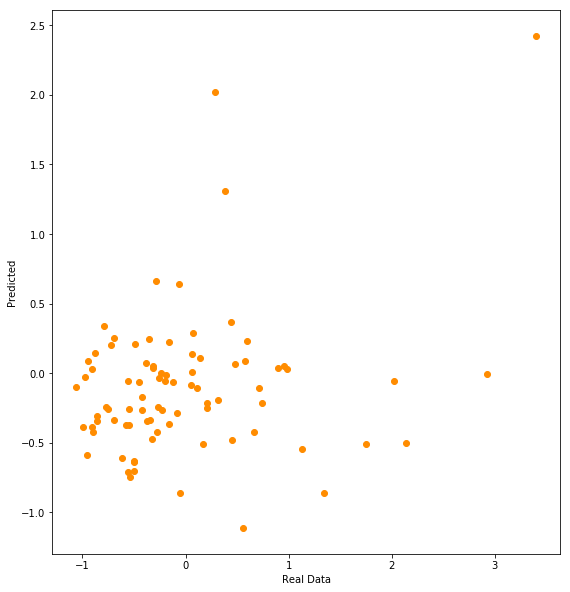

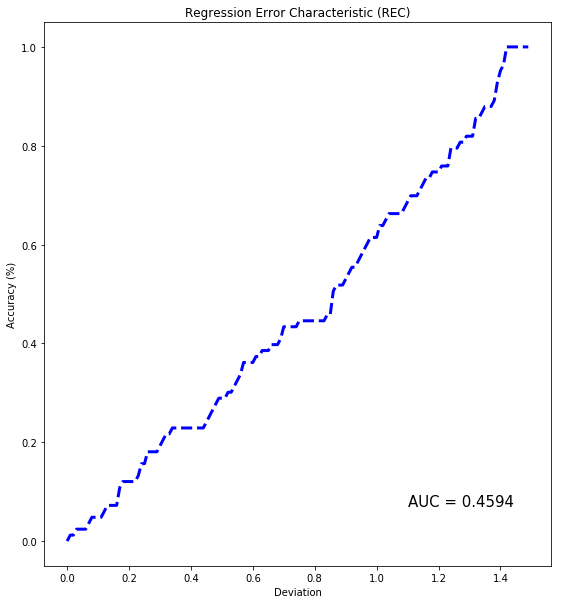

In [26]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(20 , 10))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.figure(figsize=(20 , 10))
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
print("R^2 = %0.4f" %RR)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()